
# 군집화 (Clustering)

비지도 학습(Unsupervised Learning)의 한 종류로, 데이터 집합 내에서 비슷한 특성을 가진 데이터끼리 그룹으로 묶는 작업.

### 적용 분야
- 고객 세분화(Customer Segmentation)
- 이상 탐지(Anomaly Detection)
- 이미지 분할(Image Segmentation)
- 데이터 압축(Data Compression)

---


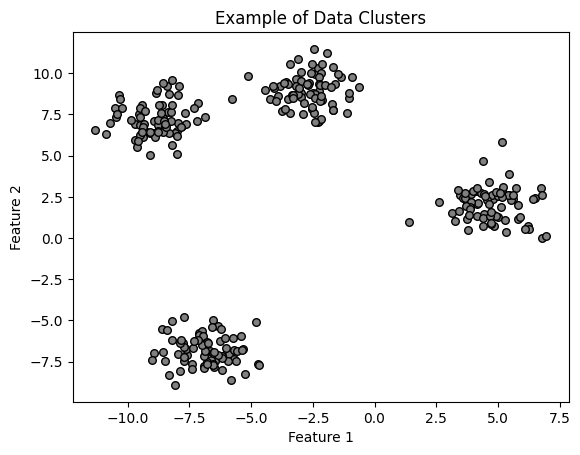

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 군집 데이터를 생성
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c='gray', s=30, edgecolor='k')
plt.title("Example of Data Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


---

# k-Means 알고리즘

k-Means는 데이터를 k개의 군집으로 나누는 가장 널리 사용되는 군집화 알고리즘.

### 주요 단계
1. **초기화**: k개의 중심점을 무작위로 설정.
2. **할당**: 각 데이터를 가장 가까운 중심점의 군집에 할당.
3. **중심 갱신**: 각 군집 내 데이터들의 평균을 새로운 중심점으로 설정.
4. **종료 조건**: 중심점의 변화가 없거나, 소속 클러스터가 바뀌지 않거나, 지정된 횟수만큼 반복.


/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


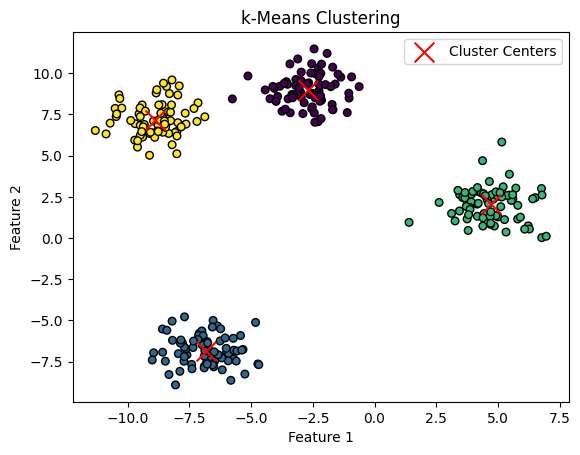

In [ ]:
from sklearn.cluster import KMeans

# k-Means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 군집 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=200, label='Cluster Centers')
plt.title("k-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


### 하이퍼 파라미터 최적화

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Method로 최적의 클러스터 수 찾기
wcss = []
for i in range(1, 11):  # 1부터 10까지의 클러스터 개수로 테스트
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_는 군집 내 제곱 오차의 합

# Elbow 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


--- 
# 군집 평가 방법

군집화의 품질을 평가하기 위한 주요 기법:

### 엘보우(Elbow) 기법
- SSE(Sum of Squared Errors): 각 데이터와 군집 중심점 간 거리 제곱의 합.
- 군집 수 증가에 따라 SSE가 감소하는데, 감소 폭이 줄어드는 지점을 최적의 k로 선택.

### 실루엣(Silhouette) 계수
- 동일 군집 내 데이터 간 거리는 가깝고, 다른 군집과의 거리는 멀수록 좋은 군집화.
- 실루엣 계수 값이 1에 가까울수록 좋음.


## 엘보우(Elbow) 기법

/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

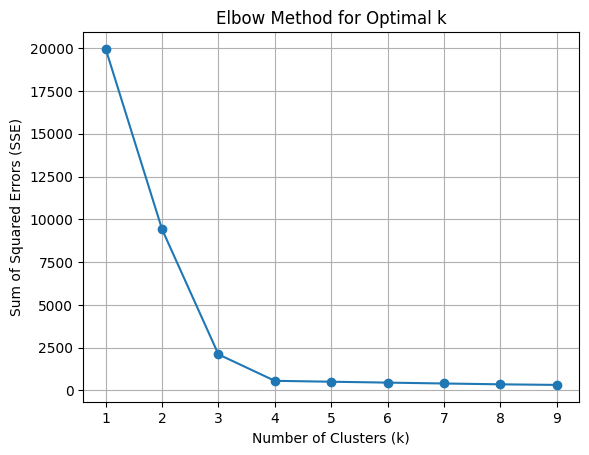

In [4]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# 엘보우 기법 시각화
plt.plot(range(1, 10), sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.show()


## 실루엣(Shihouette) 계수

/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

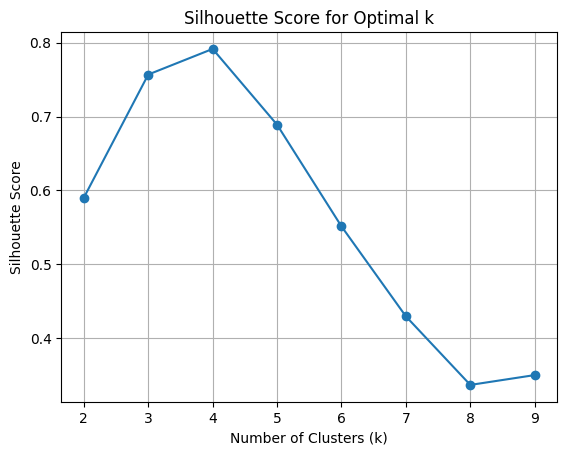

In [5]:
from sklearn.metrics import silhouette_score

# 실루엣 계수 계산 및 시각화
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_kmeans))

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Score for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


--- 
# 평균 이동 (Mean Shift)

k-Means는 중심점의 평균 위치로 이동시키는 반면, Mean Shift는 데이터의 밀도가 가장 높은 곳으로 중심을 이동.

### 특징
- 확률 밀도 함수의 피크를 중심으로 설정.
- Kernel Density Estimation(KDE)을 사용해 밀도 추정.



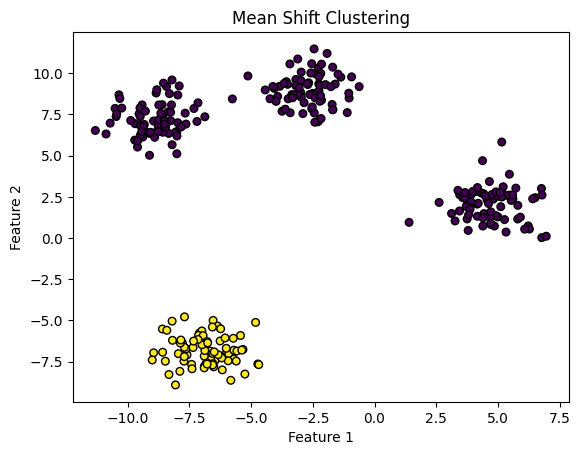

In [6]:
from sklearn.cluster import MeanShift

# 평균 이동 클러스터링
mean_shift = MeanShift()
y_meanshift = mean_shift.fit_predict(X)

# 군집 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_meanshift, cmap='viridis', s=30, edgecolor='k')
plt.title("Mean Shift Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### 하이퍼 파라미터 최적화

---

# Gaussian Mixture Model (GMM)

GMM은 데이터가 여러 개의 가우시안 분포로 이루어져 있다고 가정하고 이를 추정.

### 주요 개념
1. 각 데이터가 특정 가우시안 분포에 속할 확률을 계산.
2. EM 알고리즘을 사용해 반복적으로 평균과 분산을 추정.


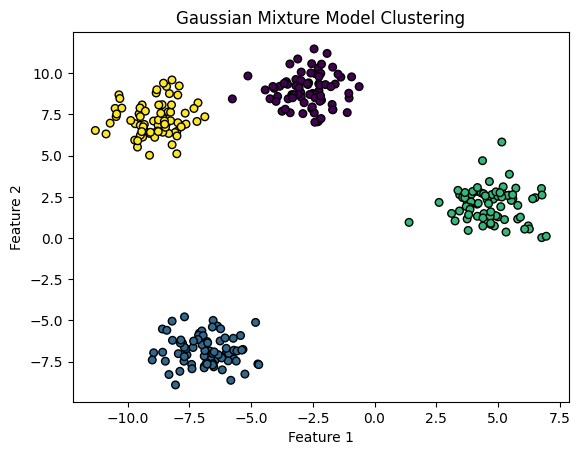

In [ ]:
from sklearn.mixture import GaussianMixture

# GMM 클러스터링
gmm = GaussianMixture(n_components=4, random_state=42)
y_gmm = gmm.fit_predict(X)

# 군집 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis', s=30, edgecolor='k')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### 하이퍼 파라미터 최적화

--- 
# DBSCAN (Density-Based Spatial Clustering)

DBSCAN은 데이터 밀도 기반으로 군집을 형성하며, 이상치(Outliers) 처리에도 강점이 있음.

### 주요 파라미터
1. **epsilon (eps)**: 입실론 반경, 데이터 간 거리의 허용 한계.
2. **min_samples**: 군집을 형성하기 위해 필요한 최소 데이터 수.

### 특징
- 데이터 분포가 기하학적으로 복잡해도 잘 작동.
- 노이즈 데이터를 군집화하지 않음.


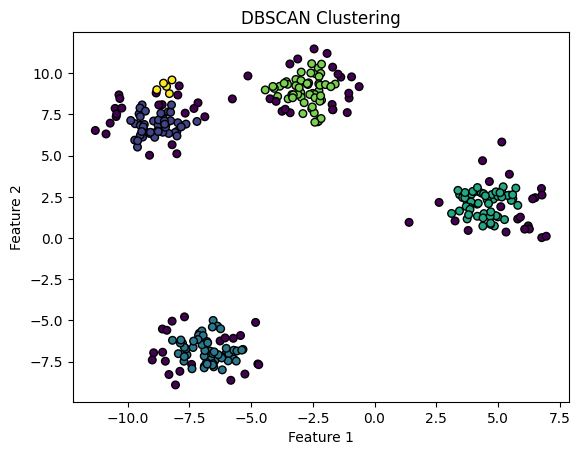

In [8]:
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# 군집 및 노이즈 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', s=30, edgecolor='k')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### 하이퍼 파라미터 최적화

--- 
# 고객 세그멘테이션 (Customer Segmentation)

고객 데이터를 군집화하여 세분화하고, 마케팅 전략을 최적화하는 기법.

### RFM 분석
- **Recency**: 최근 구매 일로부터 현재까지의 시간.
- **Frequency**: 특정 기간 내 구매 횟수.
- **Monetary Value**: 총 구매 금액.


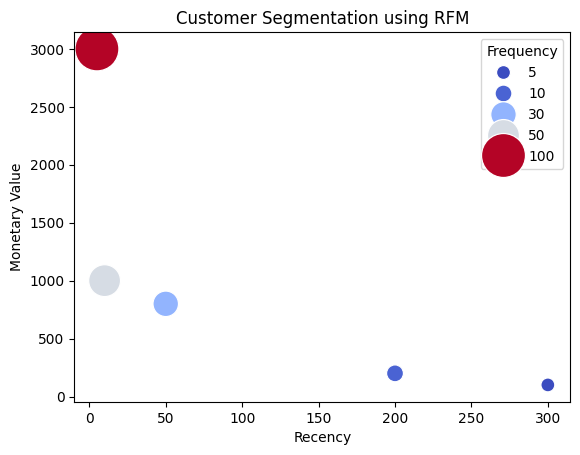

In [9]:
import pandas as pd
import seaborn as sns

# RFM 데이터 예제 생성
rfm_data = pd.DataFrame({
    'Recency': [10, 200, 5, 50, 300],
    'Frequency': [50, 10, 100, 30, 5],
    'Monetary Value': [1000, 200, 3000, 800, 100]
})

# 시각화
sns.scatterplot(data=rfm_data, x='Recency', y='Monetary Value', size='Frequency', sizes=(100, 1000), hue='Frequency', palette='coolwarm')
plt.title("Customer Segmentation using RFM")
plt.xlabel("Recency")
plt.ylabel("Monetary Value")
plt.legend(title='Frequency')
plt.show()


### 하이퍼 파라미터 최적화